In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn tensorflow keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load the Dataset

In [4]:
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
pima=pd.read_csv('D:\Data_Analyst\pima-indians-diabetes\pima-indians-diabetes.data.csv'
                 ,names=column_names)

# Initial Data Overview

In [5]:
print (pima.head().to_string(index=False))

 Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  DiabetesPedigreeFunction  Age  Outcome
           6      148             72             35        0 33.6                     0.627   50        1
           1       85             66             29        0 26.6                     0.351   31        0
           8      183             64              0        0 23.3                     0.672   32        1
           1       89             66             23       94 28.1                     0.167   21        0
           0      137             40             35      168 43.1                     2.288   33        1


In [6]:
print(pima.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [7]:
print(pima.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


# Format Data For Better Readability

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format) #p Pandas hiển thị số thực với 2 chữ số thập phân (ví dụ: 23.4567 → 23.46).

In [9]:
print (pima.head().to_string(index=False))

 Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
           6      148             72             35        0 33.60                      0.63   50        1
           1       85             66             29        0 26.60                      0.35   31        0
           8      183             64              0        0 23.30                      0.67   32        1
           1       89             66             23       94 28.10                      0.17   21        0
           0      137             40             35      168 43.10                      2.29   33        1


In [10]:
print(pima.describe().to_string(index=False))

 Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age  Outcome
      768.00   768.00         768.00         768.00   768.00 768.00                    768.00 768.00   768.00
        3.85   120.89          69.11          20.54    79.80  31.99                      0.47  33.24     0.35
        3.37    31.97          19.36          15.95   115.24   7.88                      0.33  11.76     0.48
        0.00     0.00           0.00           0.00     0.00   0.00                      0.08  21.00     0.00
        1.00    99.00          62.00           0.00     0.00  27.30                      0.24  24.00     0.00
        3.00   117.00          72.00          23.00    30.50  32.00                      0.37  29.00     0.00
        6.00   140.25          80.00          32.00   127.25  36.60                      0.63  41.00     1.00
       17.00   199.00         122.00          99.00   846.00  67.10                      2.42  81.00     1.00


# Check For Missing or Invalid Data

In [11]:
# Kiểm tra dữ liệu bị thiếu hoặc không hợp lệ.
print(pima.isnull().sum().to_string(index=False))

0
0
0
0
0
0
0
0
0


# Check for zero values

In [12]:
# kiểm tra giá trị bằng 0.
zero_values = pima.apply(lambda col : (col == 0).sum()) 
print (zero_values)


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


# Replace Zeroes With Median (where 0 is invalid)

In [13]:
# thay thế giá trị 0 bằng trung vị (median).
columns_to_replace = ['Glucose' , 'SkinThickness' , 'BloodPressure' , 'BMI' , 'Insulin']
for column in columns_to_replace:
    median_value = pima[column].median()
    pima[column]= pima[column].replace(0, median_value)

# Recheck for 0 values

In [14]:
# kiểm tra lại giá trị 0 sau khi thay bằng median.
zero_values = pima.apply (lambda col :(col == 0).sum())
print ("Zero Values after replacement")
print (zero_values)

Zero Values after replacement
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


# Histogram Distribution

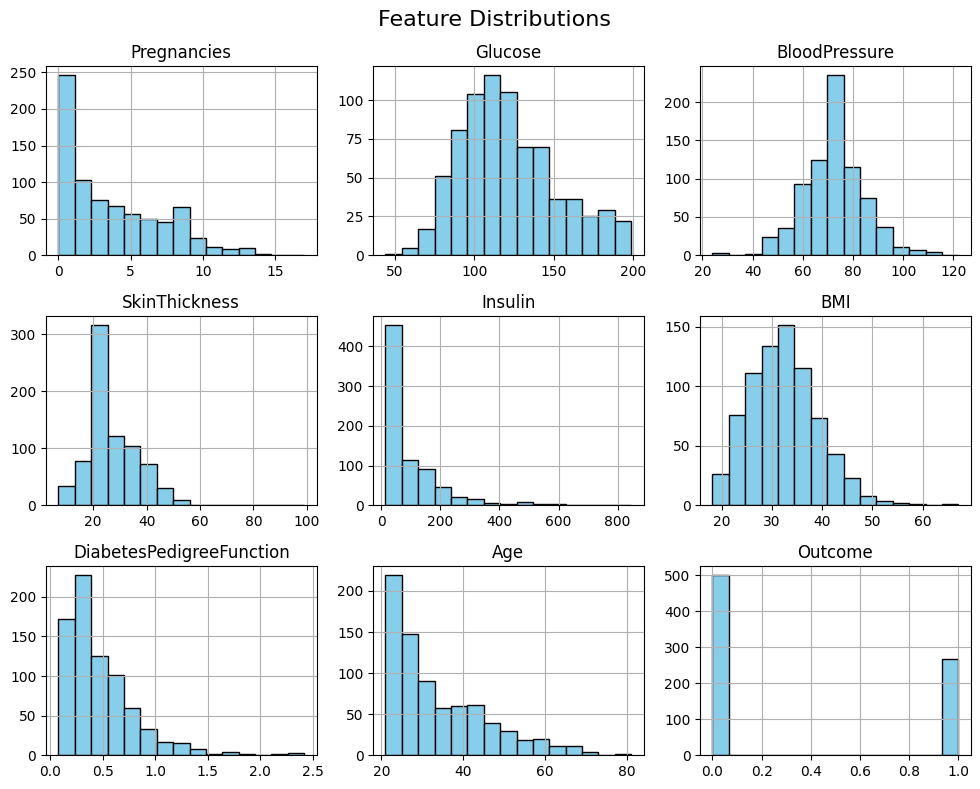

In [15]:
# vẽ biểu đồ histogram cho từng đặc trưng.
pima.hist(figsize=(10,8), bins=15, color="skyblue", edgecolor="black")
plt.suptitle('Feature Distributions', fontsize= 16)
plt.tight_layout()
plt.savefig('histogram.png')    
plt.show()


# Boxplot

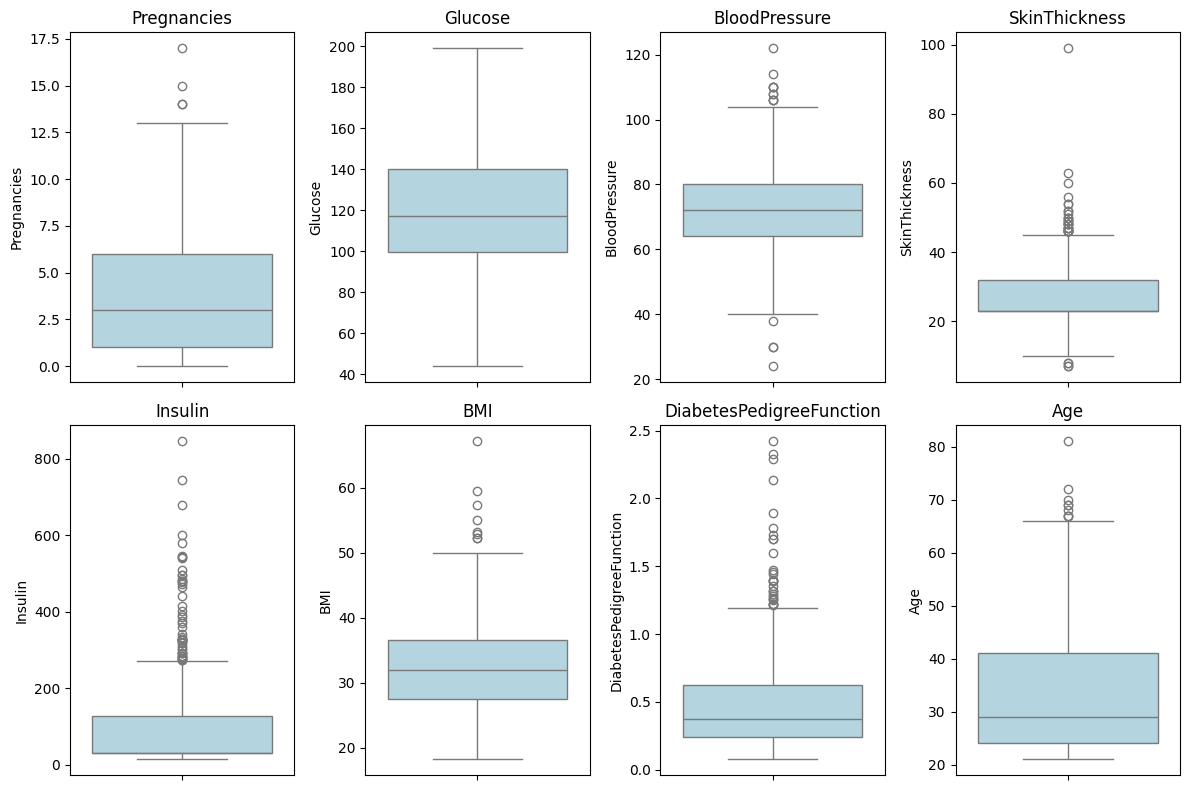

In [16]:
plt.figure(figsize=(12,8))
for i, col in enumerate(pima.drop('Outcome', axis=1).columns, 1):
                                  plt.subplot(2,4,i) # 2 rows 4 columns of plot
                                  sns.boxplot(data=pima, y=col, color='lightblue')
                                  plt.title(col)
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

# Correlation Heatmap

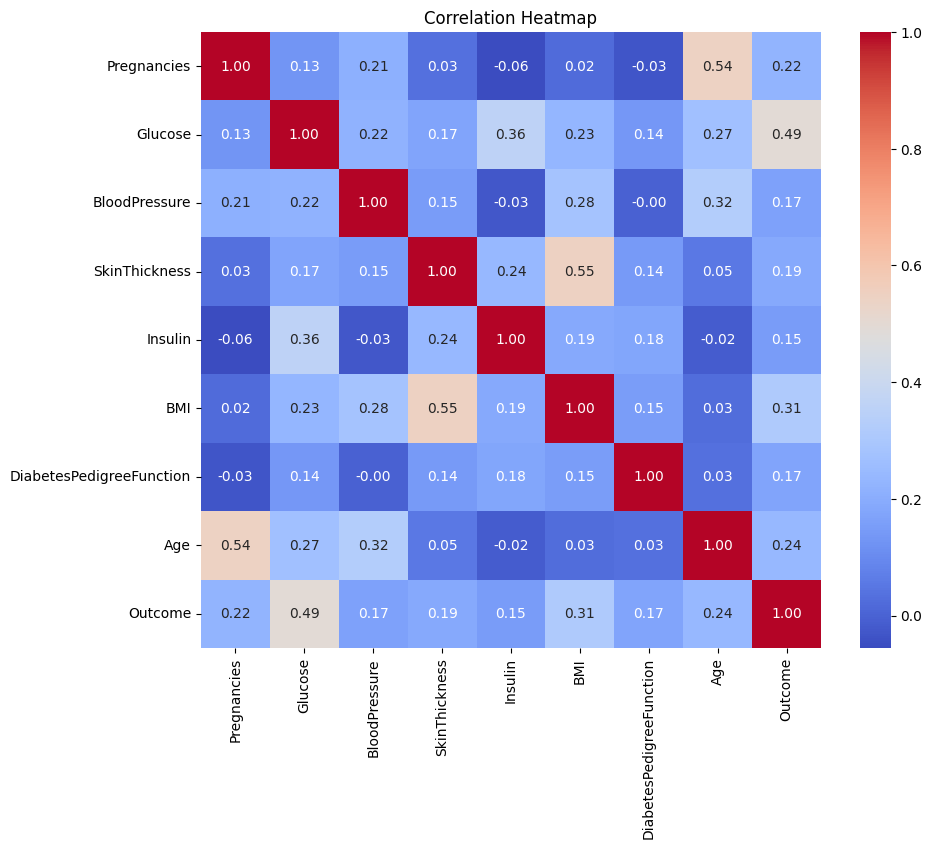

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(pima.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

# Pairplot

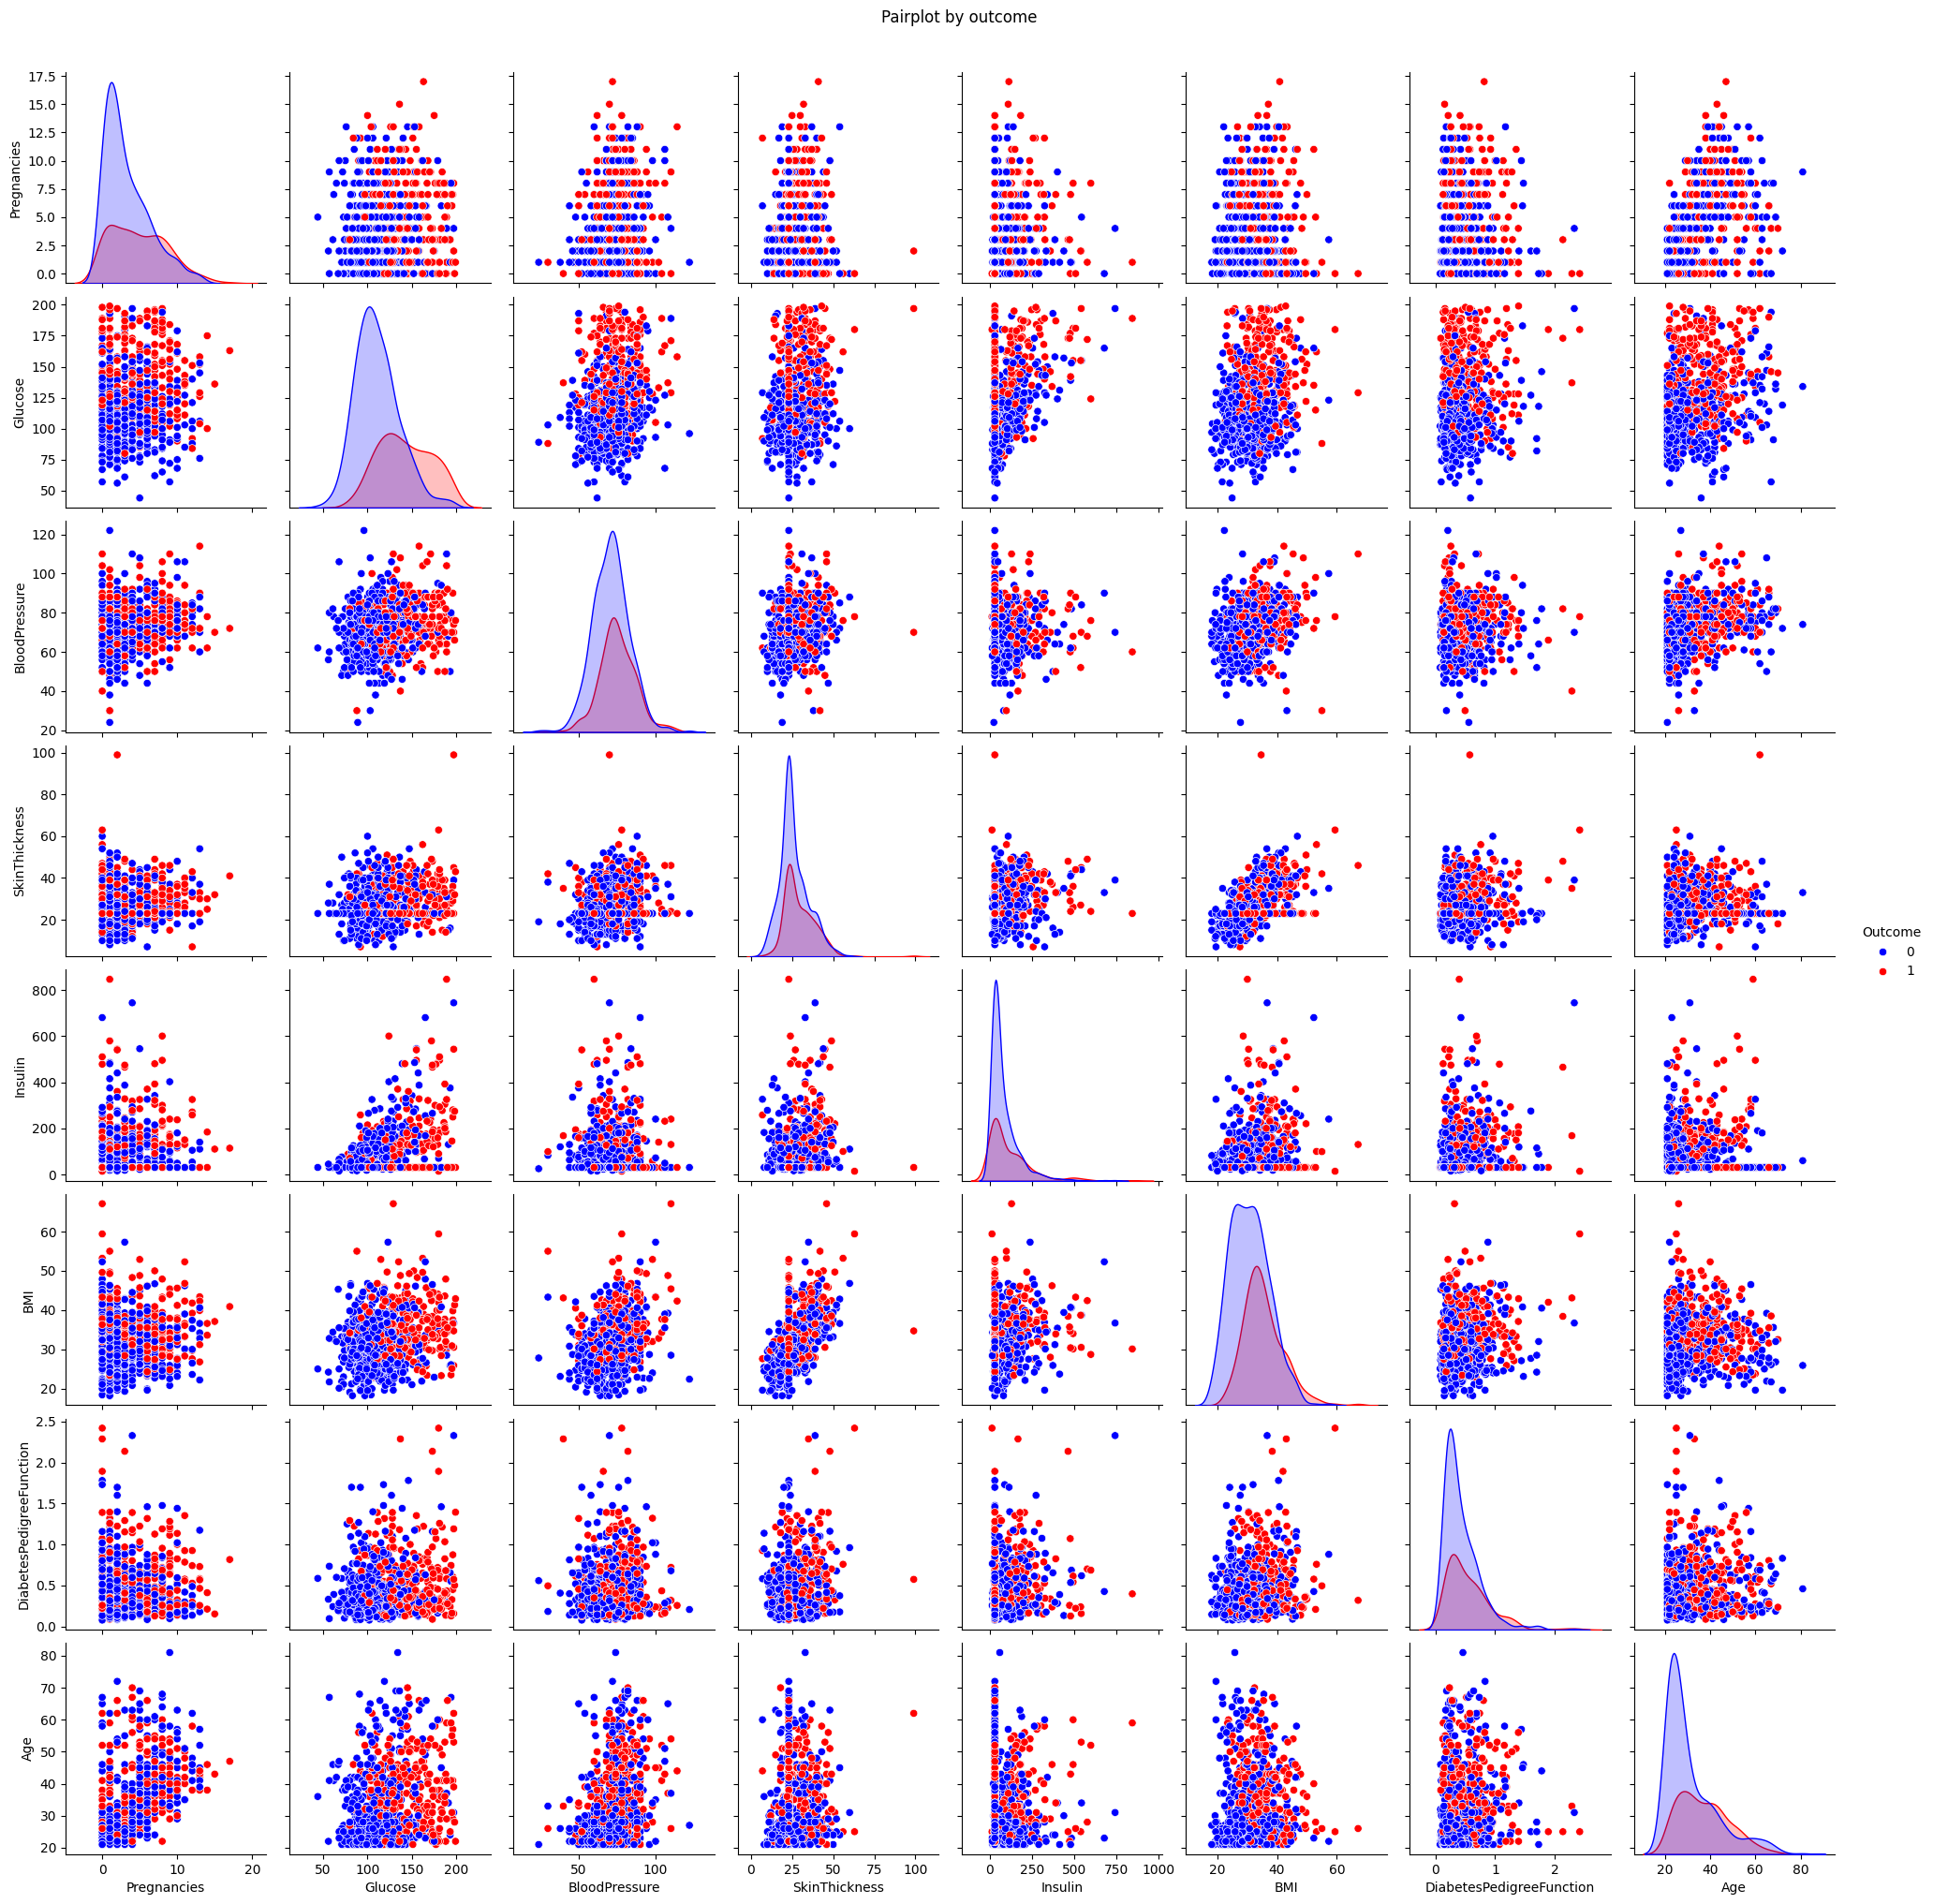

In [18]:
sns.pairplot(pima, hue='Outcome', diag_kind='kde', palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot by outcome', y =1.02)
plt.savefig('pairplot.png')
plt.show()